<h2 align="center"> P2 - Investigate a Dataset</h2>

As part of P2-Investigate a Dataset, I chose to investigate **Titanic dataset**. 


<h3>Index</h3>

* Section 1:Overview
    * Brief History
    * Dataset Information
* Section 2: Questions
* Section 3: Data Wrangling
    * Understanding the data
    * Data cleaning
* Section 4: Data Exploration
    * Analyzing Relationships
    * Investigating Survival Factors
* Section 5 : Limitation of the analysis
* Section 6 : Statistical Tests
* Section 7 : Conclusion
* Section 8 : References

<h2 align="center">SECTION 1 : OVERVIEW</h2>

<h3>Brief History</h3>

<img src="https://s-media-cache-ak0.pinimg.com/originals/bf/cc/d2/bfccd2da3c0525373b9dd84bcc99c6ff.jpg" height="100px" width="500px"/>

Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning of 15 April 1912, after colliding with an iceberg during her maiden voyage from Southampton to New York City. Of the 2,224 passengers and crew aboard, more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history. The British registered ocean liner was built in 1912 for the transatlantic passenger and mail service between Southampton and New York. Constructed at the Harland and Wolff shipyard in Belfast, Ireland the Titanic was, on her maiden voyage, the largest vessel afloat. Thomas Andrews, her architect, died in the disaster.<br/><br/>
Although Titanic had advanced safety features such as watertight compartments and remotely activated watertight doors, there were not enough lifeboats to accommodate all of those aboard due to outdated maritime safety regulations. Titanic only carried enough lifeboats for 1,178 people—slightly more than half of the number on board, and one third of her total capacity.
After leaving Southampton on 10 April 1912, e new liner sailed from Southampton, England and on  14 April, four days into the crossing and about 375 miles (600 km) south of Newfoundland, she hit an iceberg at 11:40 p.m. ship's time. The collision caused the ship's hull plates to buckle inwards along her starboard side and opened five of her sixteen watertight compartments to the sea; the ship gradually filled with water. Meanwhile, passengers and some crew members were evacuated in lifeboats, many of which were launched only partially loaded. A disproportionate number of men were left aboard because of a "women and children first" protocol for loading lifeboats.[3] At 2:20 a.m., she broke apart and foundered—with well over one thousand people still aboard. Just under two hours after Titanic sank, the Cunard liner RMS Carpathia arrived at the scene, where she brought aboard an estimated 705 survivors.<br/><br/>
It has rightly been called as the greatest shipwreck drama of the 20th century, a catastrophic event which has been greeted with worldwide shock and outrage at the huge loss of life and the regulatory and operational failures that had led to it.

<h3>Dataset Information</h3>

The dataset contains demographics and passenger information from **891** of the **2224 passengers and crew on board the Titanic**. 

** VARIABLE DESCRIPTIONS:**

<table width="50%" align="left" border="none">
<tr><td>survival</td><td>Survival<br/>(0 = No; 1 = Yes)</td></tr>
<tr><td>pclass</td><td>Passenger Class<br/>(1 = 1st; 2 = 2nd; 3 = 3rd)</td></tr>
<tr><td>name</td><td>Name</td></tr>
<tr><td>sex</td><td>Sex</td></tr>
<tr><td>age</td><td>Age</td></tr>
<tr><td>sibsp</td><td>Number of Siblings/Spouses Aboard</td></tr>
<tr><td>parch</td><td>Number of Parents/Children Aboard</td></tr>
<tr><td>ticket</td><td>Ticket Number</td></tr>
<tr><td>cabin</td><td>Cabin</td></tr>
<tr><td>embarked</td><td>Port of Embarkation<br/>(C = Cherbourg; Q = Queenstown; S = Southampton)</td></tr>
</table>


**SPECIAL NOTES:**

* Pclass is a proxy for socio-economic status (SES)<br/>
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower<br/><br/>

* Age is in Years; Fractional if Age less than One (1) <br/>
    If the Age is Estimated, it is in the form xx.5<br/><br/>

* With respect to the family relation variables (i.e. sibsp and parch) some relations were ignored.  The following are the 
  definitions used for sibsp and parch.<br/>

    Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic<br/>
    Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)<br/>
    Parent:   Mother or Father of Passenger Aboard Titanic<br/>
    Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic<br/>

    Other family relatives excluded from this study include cousins, nephews/nieces, aunts/uncles, and in-laws.  Some children   
    travelled only with a nanny, therefore parch=0 for them.  As well, some travelled with very close friends or neighbors in a 
    village, however, the definitions do not support such relations.

<h2 align="center">SECTION 2: QUESTIONS</h2>

<h3> Questions I hope to investigate in this report</h3>

Q1. Do individual passenger traits like
    
 * age
 * gender
 * age group
    
   impact their survival?

Q2. Did the passenger travelling condition namely 
 
 * class
 * port of embarkation
    
had an impact on their survival? Did individual passenger traits had any relationship with this?

 <h2 align="center">SECTION 3: DATA WRANGLING</h2>

<h3>Understanding the data set</h3>

**Imports**

In [3]:
%pylab inline
import pandas as pd
import seaborn as sns
import numpy as np

Populating the interactive namespace from numpy and matplotlib


We read the titanic-data.csv into panda data frame(**titanic_df**) and print the top 5 head records to have a overview of the data.

In [4]:
titanic_df = pd.read_csv('titanic-data.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


When I dived deeper into this data to understand the data formats and for the purposes of cleaning this data,
I found that out of **891 passenger records** available:
* Age of 177 passengers is missing
* Cabin details of only 204 passengers are available and of 607 are missing
* Port of embarkation of 2 passengers is missing

Below are the some of the general statistics about the data set

In [5]:
titanic_df.info()
titanic_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<h3>Data Cleaning</h3>

To handle and clean the missing data, I would be refining the data set as follows:

* I would not be using **cabin** details of the passengers for my analyis,so I chose to drop this column from my data frame.
* As for the missing **port of embarkation **, I chose to ignore these passengers as they are just a 0.224 proportion of the data set. 
* Since I would be investigating the passengers based on their **Age** as well, I chose to fill 0 for the missing values so that any wrong ages do not impact my analysis. Also 0 is chosen as existing passenger ages do not have passengers with age=0

In [6]:
# drop column for 'Çabin' from the data set
titanic_data_frame= titanic_df.drop('Cabin',1)

In [7]:
#Passengers with age=0 in existing data set
titanic_df[titanic_df['Age']==0]['PassengerId'].count()

0

In [8]:
#Replace NA values for age with 0
titanic_data_frame['Age'].fillna(value=0,inplace=True)
titanic_data_frame.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Also I would like to add a Survival Status column with values **Survived/Didn't Survive** corresponding to "1/0" values for Survived column for making my visualizations more readable.

In [9]:
def addSurvivalStatus(data):
    if data['Survived']==1:
        survival_status='Survived'
    else:
        survival_status='Didn\'t Survive'
    return survival_status;

In [10]:
#Apply addSurvivalStatus function to the titanic data frame
titanic_data_frame['Survival_Status'] = titanic_data_frame.apply(addSurvivalStatus, axis=1)
titanic_data_frame.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survival_Status
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Didn't Survive
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Survived
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Survived
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Survived
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Didn't Survive


The United Nations Convention on the Rights of the Child (UNRC) defines children, for the purposes of the Convention, as persons under the age 18, unless domestic legislation provides otherwise. In that spirit, this timeline includes as children all those below the UK age of majority, which was 21 until 1970, when it was reduced to 18[1] <br/>
So following this convention I would consider passengers with age between 0.1-21 years, adults with age between 18-59 and elderly with age greater than 60. <br/>
I would add like to add another column for identifying passengers based on their ages in the following format where 0 is customly added by me above:
<table align="left">
<tr><th>Age</th><th>Age classification</th></tr>
<tr><td>0</td><td>NA</td></tr>
<tr><td>Between 0.1 and 21</td><td>Children</td></tr>
<tr><td>Greater than equal to 21 but less than 60</td><td>Adult</td></tr>
<tr><td>Greater than equal to 60</td><td>Elderly</td></tr>
</table>

Implementing this age classification on the current titanic data set available:

In [11]:
def ageClassification(passenger):
    ##Ignore passengers with age equal to 0
    if passenger['Age']==0:
        return 'NA'
    if passenger['Age']>=0.1 and passenger['Age']<21:
        return "Child"
    elif passenger['Age']>=21 and passenger['Age']<60:
        return "Adult"
    else:
        return "Elderly"

In [12]:
titanic_data_frame['AgeGroup']=titanic_data_frame.apply(ageClassification,axis=1)
titanic_data_frame.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survival_Status,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Didn't Survive,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Survived,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Survived,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Survived,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Didn't Survive,Adult


**Woman and Child First**

Since there was capacity to fit in 1,178 passengers in the lifeboat from around 2,228 people onboard the Titanic[3], the Second Officer suggested to Captain Smith, "Hadn't we better get the women and children into the boats, sir?", to which the captain responded: "women and children in and lower away". The First (Officer Murdoch) and Second (Officer Lightoller) officers interpreted the evacuation order differently; one took it to mean women and children first, while the other took it to mean women and children only. Thus one of the officers lowered lifeboats with empty seats if there were no women and children waiting to board, while the other allowed a limited number of men to board if all the nearby women and children had embarked.[4]

So I want to add an additional column to the data frame for identifying whether the passenger was Woman/Child. So I would add another column to the data frame named WomanChild with value "Yes" for female passengers or child passengers and for male passengers, I would put the value "No" in this column

In [247]:
# Group passengers on basis on Woman/Child
def groupWomanChild(data):
    if data['AgeGroup']=='Child' or data['Sex']=='female':
        woman_child='Yes'
    else:
        woman_child='No'
    return woman_child;

In [246]:
#Apply groupWomanChild function to the titanic data frame
titanic_data_frame['WomanChild'] = titanic_data_frame.apply(groupWomanChild, axis=1)
titanic_data_frame.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survival_Status,AgeGroup,WomanChild
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Didn't Survive,Adult,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Survived,Adult,Yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Survived,Adult,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Survived,Adult,Yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Didn't Survive,Adult,No


<h2 align="center">SECTION 4: DATA EXPLORATION</h2>

<h3> Analyzing Relationships</h3>

To better understand the data, I would like to have a better understanding of the passenger demographics.I would like to explore the data set on the basis of the following dimensions:

* gender
* age group
* class
* port of embarkation
* other observations

**Based on Gender**

I would like to explore how many male/female passengers were onboard

In [248]:
##Find passengers data based on gender
female_passengers_df=titanic_data_frame[titanic_data_frame['Sex']=='female']
male_passengers_df=titanic_data_frame[titanic_data_frame['Sex']=='male']
print "Total Count based on gender:"
print ""
print "Male: %d" %male_passengers_df['PassengerId'].count()
print "Female: %d" %female_passengers_df['PassengerId'].count()

Total Count based on gender:

Male: 577
Female: 314


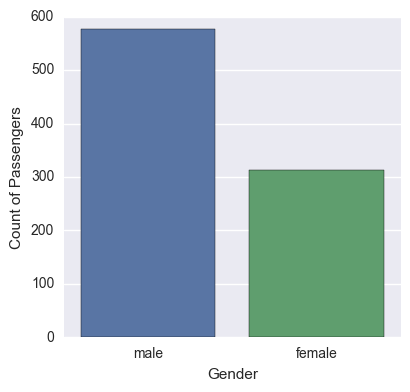

In [249]:
gender_grid = sns.factorplot("Sex",data=titanic_data_frame,kind="count")
## Modify facet grid for x/y axis text
(gender_grid.set_axis_labels("Gender", "Count of Passengers")
.despine(left=True))

From this data set it appears more male passengers were on board rather than female passengers.

**Based on age group **

I want to determine what was the average age of passengers on board the Titanic. Probably later on in my analysis,I would help me to identify whether ages of the passenger had an impact on their survival.

In [250]:
print "Count of ages in each age group"
print titanic_data_frame.groupby("AgeGroup")['Age'].count()
print ""
print "Mean of ages in each age group"
titanic_age_groups=titanic_data_frame.groupby("AgeGroup")
print titanic_age_groups['Age'].mean()
print ""
print "Maximum age of passenger onboard %f" %titanic_data_frame["Age"].max()
print ""
minimum_age=titanic_data_frame.groupby("AgeGroup").get_group('Child')['Age'].min()
print "Minimum age of passenger onboard %f" %minimum_age

Count of ages in each age group
AgeGroup
Adult      508
Child      180
Elderly     26
NA         177
Name: Age, dtype: int64

Mean of ages in each age group
AgeGroup
Adult      33.912402
Child      12.695389
Elderly    65.096154
NA          0.000000
Name: Age, dtype: float64

Maximum age of passenger onboard 80.000000

Minimum age of passenger onboard 0.420000


From this data set it appears more adults are on board as compared to children, elderly, people with no ages given(NA). Average age of passengers in the case of adults is 33.91 years, for children is 12.70 years and for elderly it is 65.10 years. Oldest passenger on board(ignoring the missing ages) had age of 80 years and the youngest passenger(ignoring the missing ages) was of 0.42 years old.

To plot the distribution of ages as a histogram of the passengers onboard, I will set the range of the plot to 0.42(minimum age) and 80(maximum age) with 80 bins 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000F462588>]], dtype=object)

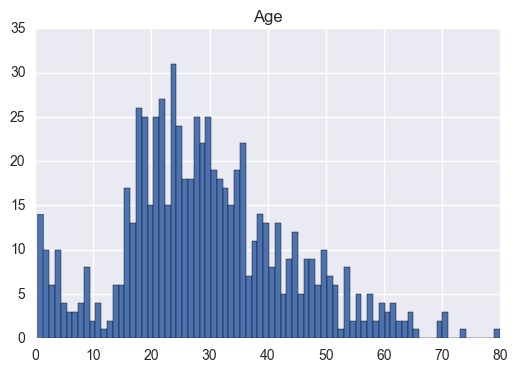

In [251]:
titanic_data_frame.hist("Age",range=[0.42, 80],bins=80)

From this visualization it appears, the maximum passenges onboard were between the age group 20-35.

For my further analysis, I would like to group passengers into various groups using a generic function, which I could use for grouping passengers based on age group as well

In [252]:
def group_passengers(data,criteria):
    return data.get_group(criteria)

In [253]:
#Group children, adult, elderly passengers
children_passengers=group_passengers(titanic_age_groups,"Child")
adult_passengers=group_passengers(titanic_age_groups,"Adult")
elderly_passengers=group_passengers(titanic_age_groups,"Elderly")

I would also like to explore the relationship between age group and the gender of the passengers from this dataset and determine any relationships present if any.

In [254]:
def group_age_gender_passengers(male_passenger,female_passenger):
    total_count = male_passenger["PassengerId"].count()+female_passenger["PassengerId"].count()
    print "Male:%f" %((float)(male_passenger["PassengerId"].count())/total_count)
    print "Female:%f" %((float)(female_passenger["PassengerId"].count())/total_count)

In [255]:
male_child_passengers=group_passengers(children_passengers.groupby("Sex"),"male")
female_child_passengers=group_passengers(children_passengers.groupby("Sex"),"female")

print "Children Gender proportion"
group_age_gender_passengers(male_child_passengers,female_child_passengers)

adult_male_passengers=group_passengers(adult_passengers.groupby("Sex"),"male")
adult_female_passengers=group_passengers(adult_passengers.groupby("Sex"),"female")

print ""
print "Adult Gender proportion"
group_age_gender_passengers(adult_male_passengers,adult_female_passengers)

elderly_male_passengers=group_passengers(elderly_passengers.groupby("Sex"),"male")
elderly_female_passengers=group_passengers(elderly_passengers.groupby("Sex"),"female")

print ""
print "Elderly Gender proportion"
group_age_gender_passengers(elderly_male_passengers,elderly_female_passengers)

Children Gender proportion
Male:0.572222
Female:0.427778

Adult Gender proportion
Male:0.645669
Female:0.354331

Elderly Gender proportion
Male:0.846154
Female:0.153846


It is evident from these statistics, that count of male passengers of each age group had been more than female passengers onboard.

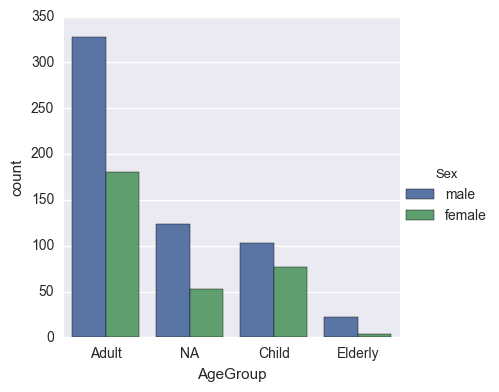

In [256]:
age_gender_grid = sns.factorplot("AgeGroup", hue="Sex",data=titanic_data_frame,kind="count")

**Based on class **

The Titanic's passengers were divided into three separate classes, determined not only by the price of their ticket but by wealth and social class: those travelling in first class, most of them the wealthiest passengers on board, included prominent members of the upper class, businessmen, politicians, high-ranking military personnel, industrialists, bankers, entertainers, socialites, and professional athletes. Second class passengers were middle class travellers and included professors, authors, clergymen, and tourists. Third class or steerage passengers were primarily emigrants moving to the United States and Canada.[5]

In [257]:
print "Count of passengers in each class"
print titanic_data_frame.groupby("Pclass")['PassengerId'].count()

Count of passengers in each class
Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64


In [258]:
#Define grouping criteria on the basis of "Pclass"
passenger_class_group=titanic_data_frame.groupby("Pclass")
#Get class 1 passengers
passenger_class1= group_passengers(passenger_class_group,1)
#Get class 2 passengers
passenger_class2= group_passengers(passenger_class_group,2)
#Get class 3 passengers
passenger_class3= group_passengers(passenger_class_group,3)

In [259]:
def compute_mean(data_set,total_data,criteria):
    return ((float)(data_set[criteria].count())/total_data[criteria].count())

In [260]:
print "Mean count of passengers per Pclass"
print "Class 1: %f" %compute_mean(passenger_class1,titanic_data_frame,"PassengerId")
print "Class 2: %f" %compute_mean(passenger_class2,titanic_data_frame,"PassengerId")
print "Class 3: %f" %compute_mean(passenger_class3,titanic_data_frame,"PassengerId")

Mean count of passengers per Pclass
Class 1: 0.242424
Class 2: 0.206510
Class 3: 0.551066


From this analysis, it is clear that the maximum number of passengers that were onboard on Titanic, were travelling in Class 3. Corresponding visualization for the same:

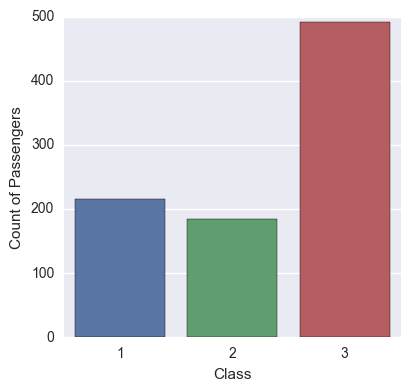

In [261]:
class_grid = sns.factorplot("Pclass",data=titanic_data_frame,kind="count")
## Modify facet grid for x/y axis text
(class_grid.set_axis_labels("Class", "Count of Passengers")
.despine(left=True))

From these statistics/visualization, it appears maximum passengers were travelling Class 3 which were for the passengers having below the normal socio-economic conditions.

Here I would like to calculate the mean count of passengers based on class and the age group

In [262]:
def age_class_grouping_passengers(child_pclass_passengers,adult_pclass_passengers,elderly_pclass_passengers):
    print "Children Passengers: %f" %compute_mean(child_pclass_passengers,children_passengers,"PassengerId")
    print "Adult Passengers: %f" %compute_mean(adult_pclass_passengers,adult_passengers,"PassengerId")
    print "Elderly Passengers: %f" %compute_mean(elderly_pclass_passengers,elderly_passengers,"PassengerId") 

In [263]:
#Define grouping criteria on the basis of "AgeGroup" for passenger in each class
passenger_class1_age_group=passenger_class1.groupby("AgeGroup")
adult_class1_passengers=group_passengers(passenger_class1_age_group,"Adult")
children_class1_passengers=group_passengers(passenger_class1_age_group,"Child")
elderly_class1_passengers=group_passengers(passenger_class1_age_group,"Elderly")
print "Mean count per age group for Class 1"
age_class_grouping_passengers(children_class1_passengers,adult_class1_passengers,elderly_class1_passengers)
print ""

passenger_class2_age_group=passenger_class2.groupby("AgeGroup")
adult_class2_passengers=group_passengers(passenger_class2_age_group,"Adult")
children_class2_passengers=group_passengers(passenger_class2_age_group,"Child")
elderly_class2_passengers=group_passengers(passenger_class2_age_group,"Elderly")

print "Mean count per age group for Class 2"
age_class_grouping_passengers(children_class2_passengers,adult_class2_passengers,elderly_class2_passengers)
print ""

passenger_class3_age_group=passenger_class3.groupby("AgeGroup")
adult_class3_passengers=group_passengers(passenger_class3_age_group,"Adult")
children_class3_passengers=group_passengers(passenger_class3_age_group,"Child")
elderly_class3_passengers=group_passengers(passenger_class3_age_group,"Elderly")

print "Mean count per age group for Class 3"
age_class_grouping_passengers(children_class3_passengers,adult_class3_passengers,elderly_class3_passengers)

Mean count per age group for Class 1
Children Passengers: 0.116667
Adult Passengers: 0.291339
Elderly Passengers: 0.653846

Mean count per age group for Class 2
Children Passengers: 0.194444
Adult Passengers: 0.263780
Elderly Passengers: 0.153846

Mean count per age group for Class 3
Children Passengers: 0.688889
Adult Passengers: 0.444882
Elderly Passengers: 0.192308


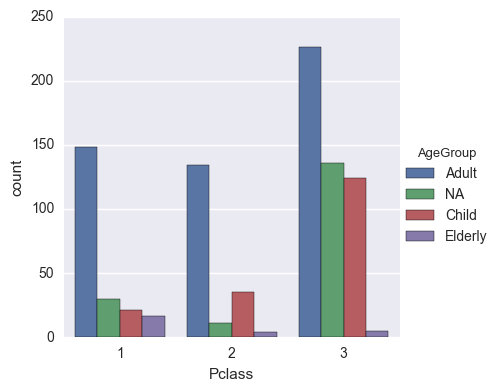

In [264]:
class_age_grid = sns.factorplot("Pclass", hue="AgeGroup",data=titanic_data_frame,kind="count")

From this data it is evident that the maximum number of passengers in the age group "Adult" were in Class 3(with average 0.444882), "Child" were also in Class 3 (with average 0.688889) and elderly were in Class 1(with average 0.033465)

I would also like to explore the proportion of female passengers versus the male passengers in each class.

In [265]:
def calculate_male_female_proportion_class(data):
    class_gender_array=data.groupby("Sex")["PassengerId"].count()
    male_count= class_gender_array.get("male")
    female_count=class_gender_array.get("female")
    print "Male: %f" %((float(male_count))/(male_count+female_count))
    print "Female: %f" %((float(female_count))/(male_count+female_count))

In [266]:
print "Gender proportions per class"
print "Class 1"
calculate_male_female_proportion_class(passenger_class1)
print ""
print "Class 2"
calculate_male_female_proportion_class(passenger_class2)
print ""
print "Class 3"
calculate_male_female_proportion_class(passenger_class3)

Gender proportions per class
Class 1
Male: 0.564815
Female: 0.435185

Class 2
Male: 0.586957
Female: 0.413043

Class 3
Male: 0.706721
Female: 0.293279


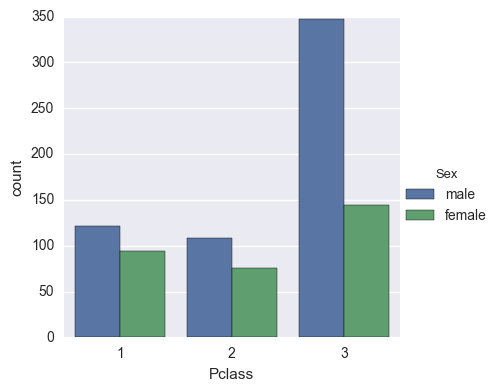

In [267]:
class_age_grid = sns.factorplot("Pclass", hue="Sex",data=titanic_data_frame,kind="count")

As it is already evident that the maximum number of passengers in the data set are male, from this visualization it is clear as well that the proportion of male passengers in each class had between significantly higher than the female passengers. The maximum difference in proportions had been in Class 3 with 0.706721 males versus 0.293279 female passengers

**Based on Port of Embarkation**

For my analysis I would like to identify if the boarding point (or the port of embarkation) had any impact on the passenger's survival. So I would like to group passengers on the basis of their port of embarkation as well.

In [268]:
#Group passengers based on port of embarkation
port_passengers=titanic_data_frame.groupby("Embarked")
print "Passengers count for each port" 
print port_passengers["PassengerId"].count()

Passengers count for each port
Embarked
C    168
Q     77
S    644
Name: PassengerId, dtype: int64


Reusing the above defined funtion for grouping passengers based on criteria and computing mean, I can do the same for classifying passengers based on their port of Embarkation i.e.Cherbourg, Queenstown, Southampton

In [269]:
#Separate dataframes for each port
port_s_passengers=group_passengers(port_passengers,"S")
port_q_passengers=group_passengers(port_passengers,"Q")
port_c_passengers=group_passengers(port_passengers,"C")

Here I reuse the above function to calculate mean probability of passengers embarking from each port

In [270]:
print "Average number of passengers for each port"
print "Cherbourg %f" %compute_mean(port_c_passengers,titanic_data_frame,"PassengerId")
print "Queenstown %f" %compute_mean(port_q_passengers,titanic_data_frame,"PassengerId")
print "Southampton %f" %compute_mean(port_s_passengers,titanic_data_frame,"PassengerId")

Average number of passengers for each port
Cherbourg 0.188552
Queenstown 0.086420
Southampton 0.722783


Corresponding visualization for the same

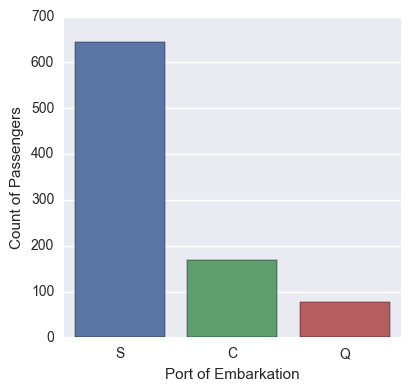

In [271]:
port_embark_fg = sns.factorplot("Embarked",data=titanic_data_frame,kind="count")
## Modify facet grid(port_embark_fg) for x/y axis text
(port_embark_fg.set_axis_labels("Port of Embarkation", "Count of Passengers")
.despine(left=True))

From this analysis it is clear that the maximum number of passengers who embarked in Titanic were from Southampton.

**Based on Survival**

For my further analysis and for answering the above mentioned questions, I would like to keep data sets of surviving and non surviving passengers seperately.

In [272]:
## split data frames into groups of passengers who survived
surviving_passengers_df =titanic_data_frame[titanic_data_frame['Survived']==1]
## split data frames into groups of passengers who did not survive
non_surviving_passengers_df =titanic_data_frame[titanic_data_frame['Survived']==0]
surviving_passengers_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survival_Status,AgeGroup,WomanChild
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Survived,Adult,Yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Survived,Adult,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Survived,Adult,Yes
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,Survived,Adult,Yes
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,Survived,Child,Yes


Visualization of passengers how many passengers survived and how many did not

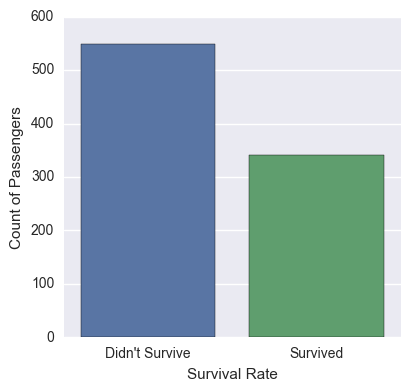

In [273]:
## Factor plot to show count of passengers who survived
survival_fg = sns.factorplot(x="Survival_Status",data=titanic_data_frame,kind="count")
## Modify facet grid for x/y axis text
(survival_fg.set_axis_labels("Survival Rate", "Count of Passengers")
.despine(left=True))

In [274]:
##Calculate count of passengers who survived and who did not
surviving_passengers_count = surviving_passengers_df['PassengerId'].count()
print "Survival count"
print ""
print "Survived: %d" %surviving_passengers_count
non_surviving_passengers_count = non_surviving_passengers_df['PassengerId'].count()
print "Did not survive: %d" %non_surviving_passengers_count

print "Survival proportion:%f" %(float(surviving_passengers_count)/(non_surviving_passengers_count+surviving_passengers_count))

Survival count

Survived: 342
Did not survive: 549
Survival proportion:0.383838


From these statistics, its visible that from the total count of passengers i.e. 891 in the dataset, only a small proportion of 0.383838 passengers had chances of survival.

<h3>Other Observations</h3>

**Based on Ticket Number **

After viewing the entire Titanic data set, I realized that there are multiple passengers having the same ticket number. It could be that these passengers may be family members. But there are instances when the SibSp(sibling and spouse) column and  Parch(parent and child) columns have 0 values for passengers having same ticket number. But there may be more than passenger having more than 1 same ticket number. 

So it could be friends, girlfriends, cousins, servants, step family members, nannies etc that may be travelling with the main passenger and since they are not immediate family member so the Parch and SibSp have 0 values. Since it may not be necessary that servants etc would be travelling in the same cabin as their master, I want to analyze how many people who were travelling as a group/with the same ticket number that had lost more than 1 member in that group.

In [275]:
#Group passengers based on the same ticket number
same_ticket_passengers=titanic_data_frame.groupby('Ticket')
#calculate passenger group count
same_ticket_passengers_total= same_ticket_passengers.ngroups
print "Passenger groups count %d" %same_ticket_passengers_total
#count number of passengers in each group
ticket_total_passenger_count=same_ticket_passengers['PassengerId'].count()
passenger_group_non_surviving_count=0
#Iterate passenger group to calculate count of passengers if survival count in each group < 1
for ticket_number,data_point in same_ticket_passengers:
    passengers_count=ticket_total_passenger_count.get(ticket_number)
    surviving_ticket_passengers_count= data_point[data_point['Survived']==1]['PassengerId'].count()
    survival_proportion = surviving_ticket_passengers_count/passengers_count;
    if survival_proportion<1:
        passenger_group_non_surviving_count+=1
print "Families impacted by the disaster %d" %passenger_group_non_surviving_count
print ""
print "Proportion of passenger groups travelling together who:"
print ""
print "Lost member(s) in disaster: %f" %((float)(passenger_group_non_surviving_count)/same_ticket_passengers_total)
print "Did not loose member(s) in disaster: %f"  %((float)(same_ticket_passengers_total-passenger_group_non_surviving_count)/same_ticket_passengers_total)

Passenger groups count 681
Families impacted by the disaster 470

Proportion of passenger groups travelling together who:

Lost member(s) in disaster: 0.690162
Did not loose member(s) in disaster: 0.309838


From these statistics it is evident, that about 0.690162 proportion of families/passenger groups were impacted by the disaster as they had lost one or more than one member of the same ticket group in the disaster which explains the calamity of the disaster. This shows at least 69% of passenger groups travelling in the Titanic had lost a loved one/person they knew in the ship wreck.

**Women and Children first **

I want to calculate proportion for woman/child passengers vs the male passengers to understand if it had any impact

In [276]:
#Group womanchild passengers and men passengers
woman_child_passengers=group_passengers(titanic_data_frame.groupby("WomanChild"),"Yes")
men_passengers=group_passengers(titanic_data_frame.groupby("WomanChild"),"No")
print "Woman Child passengers"
print "Count: %d" %woman_child_passengers['PassengerId'].count()
print "Proportion %f" %compute_mean(woman_child_passengers,titanic_data_frame,"PassengerId")
print ""
print "Male passengers"
print "Count: %d" %men_passengers['PassengerId'].count()
print "Proportion %f" %compute_mean(men_passengers,titanic_data_frame,"PassengerId")

Woman Child passengers
Count: 417
Proportion 0.468013

Male passengers
Count: 474
Proportion 0.531987


From these statistics it appears that around 47% of passengers onboard the Titanic were women or children and around 53% were men.

<h3>Investigating survival factors</h3>

Here I would like to answer the questions I put up in **Section 2: Questions** of this report which probably governed passenger's survival namely :
 * individual passenger traits
 * passenger's travelling conditions
 * passenger's company

Let us start with exploring the answers to these questions

<h4>1. Individual Passenger Traits</h4>

** Based on Gender**

I want to investigate whether the gender of the passengers played any part in survival of the passengers. Can I reach a conclusion on the basis of this data set whether males or females had more chances of survival in the disaster

Comparison count of males/females who survived

Calculate count of passengers on board who survived and who did not based on gender:

In [277]:
#Function to group surviving/non surviving passengers based on gender
def passenger_survival(data,factor,value):
    return data[data[factor]==value]

In [278]:
##Find surviving passengers data frame based on gender
male_surviving_passengers_df = passenger_survival(surviving_passengers_df,'Sex','male')
female_surviving_passengers_df = passenger_survival(surviving_passengers_df,'Sex','female')
print "Survival count based on gender:"
print ""
print "Survived:"
print "Male: %d" %male_surviving_passengers_df['PassengerId'].count()
print "Female: %d" %female_surviving_passengers_df['PassengerId'].count()

##Find non-surviving passengers df based on gender
male_non_surviving_passengers_df = passenger_survival(non_surviving_passengers_df,'Sex','male')
female_non_surviving_passengers_df = passenger_survival(non_surviving_passengers_df,'Sex','female')
print ""
print "Did not Survive:"
print "Male: %d" %male_non_surviving_passengers_df['PassengerId'].count()
print "Female: %d" %female_non_surviving_passengers_df['PassengerId'].count()

Survival count based on gender:

Survived:
Male: 109
Female: 233

Did not Survive:
Male: 468
Female: 81


**Visualization**

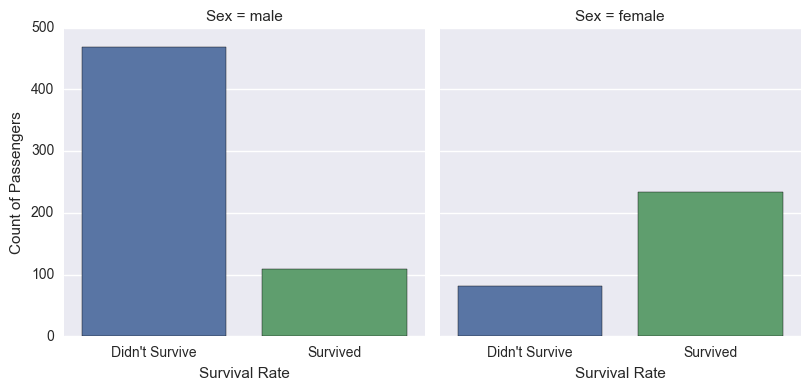

In [279]:
gender_fg = sns.factorplot(x="Survival_Status",col="Sex",data=titanic_data_frame,kind="count")
## Modify facet grid for x/y axis text
(gender_fg.set_axis_labels("Survival Rate", "Count of Passengers")
.despine(left=True))

From these statistics we could make there were more male passengers onboard then female passengers. But more female passengers had survived the passengers. 

The rate of survival for male vs female passengers wrt. to their total count:

In [280]:
print "Proportion of passengers who survived"
print "Male: %f" %compute_mean(male_surviving_passengers_df,male_passengers_df,"PassengerId")
print "Female: %f" %compute_mean(female_surviving_passengers_df,female_passengers_df,"PassengerId")

Proportion of passengers who survived
Male: 0.188908
Female: 0.742038


From this we can make out that the **female passengers had more chances of surviving from the male passengers** of about 0.742 in the presented data set.

<h4>Based on age</h4>

From the surviving passenger, I want to determine whether the age group they belonged to played a role in their survival. To analyze this I can count the number of passengers in each age group.

In [281]:
surviving_passengers_df.groupby("AgeGroup")['PassengerId'].count()

AgeGroup
Adult      201
Child       82
Elderly      7
NA          52
Name: PassengerId, dtype: int64

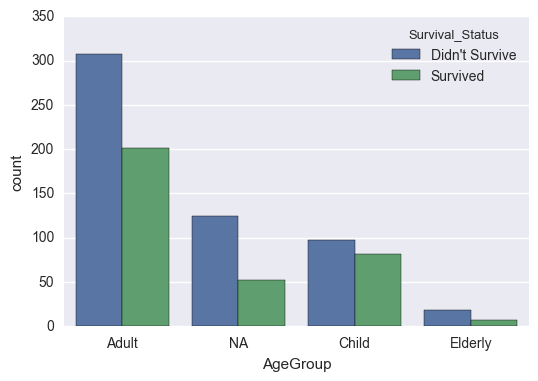

In [282]:
ax = sns.countplot(x="AgeGroup", hue="Survival_Status", data=titanic_data_frame)

From this visualization it is visible that maximum number of adult passengers had died in the disaster and child passengers had survived more in the disaster.

**Based on Age and sex**

We can also determine relationship between passenger survival based on age and sex

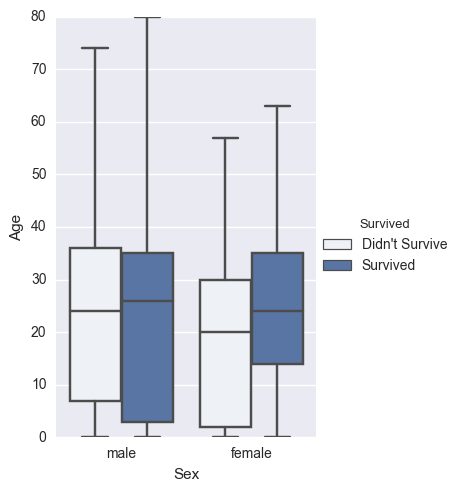

In [289]:
titanic_fg = sns.FacetGrid(titanic_data_frame,size=5, aspect=.7)
(titanic_fg.map(sns.boxplot, "Sex", "Age", "Survival_Status")
.despine(left=True)
.add_legend(title="Survived"))  

From this we can make out, **Female passengers had more chances of surviving**. Male passenges who survived had an average age around 23 and female passengers who survived had an average age around 25.

In [290]:
print "Male"
print "Survival rate %f" %male_surviving_passengers_df['Age'].mean()
print "Oldest %f" %male_surviving_passengers_df['Age'].max()
print ""
print "Female"
print "Survival rate %f" %female_surviving_passengers_df['Age'].mean()
print "Oldest %f" %female_surviving_passengers_df['Age'].max()

Male
Survival rate 23.272202
Oldest 80.000000

Female
Survival rate 24.390558
Oldest 63.000000


We can also check the relationship between the age group of passengers, sex and how much it impacted their survival rate

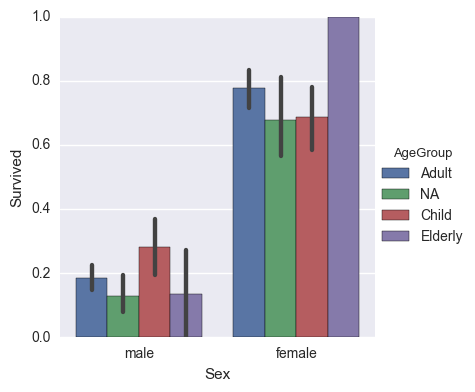

In [291]:
sex_age_group_axis = sns.factorplot(x="Sex", y="Survived", hue="AgeGroup", data=titanic_data_frame,kind="bar")

From this graph we can clearly make out that elderly woman had 100% survival rate. Female passengers in general had the highest survival rate. The statistics corresponding to this:

In [292]:
#Group surviving female passengers based on age group and count surviving passsengers 
surviving_female_ages=female_surviving_passengers_df.groupby('AgeGroup')['PassengerId'].count()
#Group all female passengers based on age group and count  passsengers 
all_female_ages=female_passengers_df.groupby('AgeGroup')['PassengerId'].count()
print "Surviving Female age groups average:"
print surviving_female_ages/all_female_ages

#Group surviving male passengers based on age group and count surviving passsengers 
surviving_male_ages=male_surviving_passengers_df.groupby('AgeGroup')['PassengerId'].count()
#Group all male passengers based on age group and count passsengers 
all_male_ages=male_passengers_df.groupby('AgeGroup')['PassengerId'].count()
print ""
print "Surviving Male age groups average"
print surviving_male_ages/all_male_ages

Surviving Female age groups average:
AgeGroup
Adult      0.777778
Child      0.688312
Elderly    1.000000
NA         0.679245
Name: PassengerId, dtype: float64

Surviving Male age groups average
AgeGroup
Adult      0.185976
Child      0.281553
Elderly    0.136364
NA         0.129032
Name: PassengerId, dtype: float64


In [293]:
surviving_children_passengers=passenger_survival(surviving_passengers_df,"AgeGroup","Child")
surviving_adult_passengers=passenger_survival(surviving_passengers_df,"AgeGroup","Adult")
surviving_elderly_passengers=passenger_survival(surviving_passengers_df,"AgeGroup","Elderly")

**Based on Woman/Child passengers**

I would like to determine did being in the passenger group of woman/child helped in the survival of the passengers.

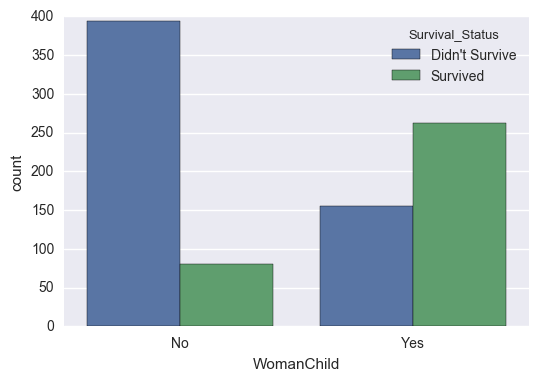

In [294]:
womanchild_survival_axis = sns.countplot(x="WomanChild", hue="Survival_Status", data=titanic_data_frame)

From this visualization it is evident that the woman/child group had better survival count compared to men passengers.

In [295]:
print "Survival Proportion:"
woman_child_survivors = woman_child_passengers[woman_child_passengers['Survived']==1]
men_survivors = men_passengers[men_passengers['Survived']==1]
print "Woman Child: %f" %compute_mean(woman_child_survivors,woman_child_passengers,"PassengerId")
print "Men: %f" %compute_mean(men_survivors,men_passengers,"PassengerId")

Survival Proportion:
Woman Child: 0.628297
Men: 0.168776


Also the above statistics confirm that woman child passengers had about 62% chances of survival from this data set as again men passengers with about 18% chances.

<h4>2. Passenger's travelling conditions</h4>

**Based on Pclass**

I want to investigate whether the passenger class played any part in survival of the passengers. So I group surviving passengers into their Pclass i.e. 1,2,3 and determine whether it helped in their survival.

In [296]:
def compute_counts(data,criteria):
    return data[criteria].count()

In [297]:
#Group pass
surviving_class1_passengers=passenger_survival(surviving_passengers_df,'Pclass',1)
print "In class 1"
print "%d survived out of %d" %(compute_counts(surviving_class1_passengers,'PassengerId'),compute_counts(passenger_class1,'PassengerId'))    
print "Survival Proportion: %f" %compute_mean(surviving_class1_passengers,passenger_class1,'PassengerId')

print ""
surviving_class2_passengers = passenger_survival(surviving_passengers_df,'Pclass',2)
print "In class 2"
print "%d survived out of %d" %(compute_counts(surviving_class2_passengers,'PassengerId'),compute_counts(passenger_class2,'PassengerId'))
print "Survival Proportion: %f" %compute_mean(surviving_class2_passengers,passenger_class2,'PassengerId')

surviving_class3_passengers = passenger_survival(surviving_passengers_df,'Pclass',3)
print ""
print "In class 3"
print "%d survived out of %d" %(compute_counts(surviving_class3_passengers,'PassengerId'),compute_counts(passenger_class3,'PassengerId'))
print "Survival Proportion: %f" %compute_mean(surviving_class3_passengers,passenger_class3,'PassengerId')

In class 1
136 survived out of 216
Survival Proportion: 0.629630

In class 2
87 survived out of 184
Survival Proportion: 0.472826

In class 3
119 survived out of 491
Survival Proportion: 0.242363


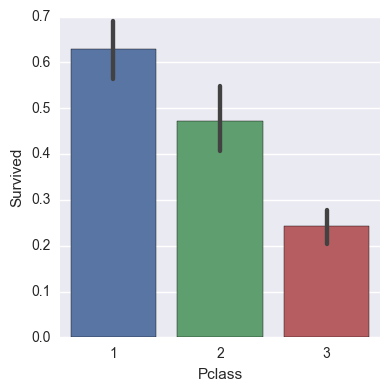

In [298]:
class_grid = sns.factorplot("Pclass","Survived",  data=titanic_data_frame,kind="bar")

From these statistics and visualizations it appears that the **passengers in Pclass 1** had higher chances of survival of about 62.9% and **class 3 had lower chances of survival** of about 24.2%.

On researching this further I found the below analysis:

![Cabin Information](https://www.encyclopedia-titanica.org/files/1/figure-one-side-view.gif)

The above figure illustrates the division of class that existed on-board the Titanic, we see First Class passengers enjoying the upper and most central spaces while Third Class and Crew occupy the lowest extremities of the ship. In fact, this segregation extended to advertisement and embarkation with each class having its own booking office  and entrance to the ship. So probably this fact alone facilitated the great loss of life among the Third Class.[6]

We can also check from surviving passengers passengers of which gender has the highest probability of surviving in each class

**Based on Pclass and Sex**

I want to investigate whether the gender also played a part in survival of passengers across various passenger classes.

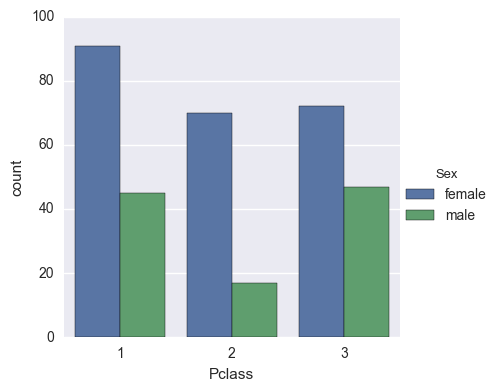

In [299]:
surviving_gender_class_grid = sns.factorplot("Pclass",hue="Sex",kind="count",data=surviving_passengers_df)

In [300]:
print "Survival status for gender/class"
print "Class 1"
print passenger_class1.groupby('Sex').Survived.mean()
print ""
print "Class 2"
print passenger_class2.groupby('Sex').Survived.mean()
print ""
print "Class 3"
print passenger_class3.groupby('Sex').Survived.mean()

Survival status for gender/class
Class 1
Sex
female    0.968085
male      0.368852
Name: Survived, dtype: float64

Class 2
Sex
female    0.921053
male      0.157407
Name: Survived, dtype: float64

Class 3
Sex
female    0.500000
male      0.135447
Name: Survived, dtype: float64


From this visualization it is clear that **female passengers had survival rate irrespective of the class** they were travelling in. In class 1 it is 96.8%, class 2 it is 92.1% and class 3 it is around 50%

**Based on Pclass and AgeGroup**

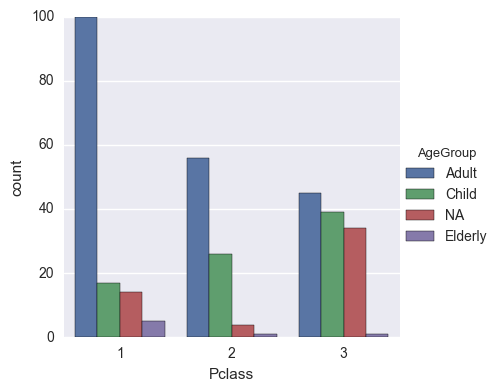

In [301]:
surviving_class_age_grid = sns.factorplot("Pclass",hue="AgeGroup",kind="count",data=surviving_passengers_df)

From this visualization, it appears that **adults**(between age 21-59) **had the highest overall rate of survival in all the classes**, highest being in Class 3. **Children have the highest rate of survival in Class 3 and elderly in Class 1**.

The statistics corresponding to this are:

In [302]:
print "Mean survival per age group"
print "Class 1"
print "Children: %f" %children_class1_passengers.Survived.mean()
print "Adult: %f" %adult_class1_passengers.Survived.mean()
print "Elderly: %f" %elderly_class1_passengers.Survived.mean()

print ""
print "Class 2"
print "Children: %f" %children_class2_passengers.Survived.mean()
print "Adult: %f" %adult_class2_passengers.Survived.mean()
print "Elderly: %f" %elderly_class2_passengers.Survived.mean()

print ""
print "Class 3"
print "Children: %f" %children_class3_passengers.Survived.mean()
print "Adult: %f" %adult_class3_passengers.Survived.mean()
print "Elderly: %f" %elderly_class3_passengers.Survived.mean()

Mean survival per age group
Class 1
Children: 0.809524
Adult: 0.675676
Elderly: 0.294118

Class 2
Children: 0.742857
Adult: 0.417910
Elderly: 0.250000

Class 3
Children: 0.314516
Adult: 0.199115
Elderly: 0.200000


From the above statistic, it appears about 80.9% of children, 67.5% of adults, 29.41% of elderly in survived in class 1. In class 2 about 74.2% of children, 41.7% of adults, 25% of elderly survived. Class 3 had the lowest proportion of survival with children being 31.4%, adults with 19.9% and elderly with about 20%.

** Based on Woman/Child Passengers**

It has been earlier stated that the lifeboat preference was given to women/children. I wanted to analyze whether being a woman/child affect survivability of the passengers.

In [317]:
class1_woman_child_passengers=passenger_class1[passenger_class1['WomanChild']=='Yes']
class2_woman_child_passengers=passenger_class2[passenger_class2['WomanChild']=='Yes']
class3_woman_child_passengers=passenger_class3[passenger_class3['WomanChild']=='Yes']

print "Woman/Child survival per class"
print "Class 1: %f" %class1_woman_child_passengers.Survived.mean()
print "Class 2: %f" %class2_woman_child_passengers.Survived.mean()
print "Class 2: %f" %class3_woman_child_passengers.Survived.mean()

Woman/Child survival per class
Class 1: 0.940594
Class 2: 0.842105
Class 2: 0.393665


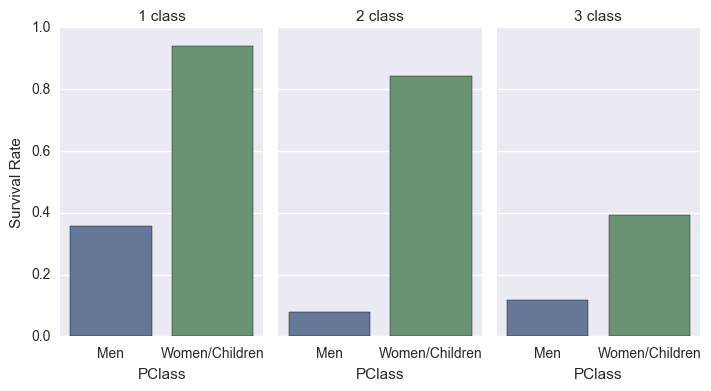

In [332]:
woman_child_survival_fg = sns.factorplot(x="WomanChild", y="Survived", col="Pclass",
                 data=titanic_data_frame, saturation=.5,
                 kind="bar", ci=None, aspect=.6)
(woman_child_survival_fg.set_axis_labels("PClass", "Survival Rate")
.set_xticklabels(["Men", "Women/Children"])
.set_titles("{col_name} class")
.set(ylim=(0, 1))
.despine(left=True))

This visualization represents the survival rate per class for men vs women/child. And it clearly states that **women/child passengers had highest rate of survival per passenger class**.

**Based on port of embarkation **

I want to calculate survival rate of passengers based on the port of embarkation. I want to determine whether the boarding point of passenger i.e. Cherbourg, Queenstown,Southampton had any impact on their survival.

In [336]:
## Statistics based on port of embarkation
print 'Count per embarked port'
print surviving_passengers_df.groupby('Embarked')['PassengerId'].count()
print 'Mean per embarked port'
print titanic_data_frame.groupby('Embarked').Survived.mean()
print 'Standard Deviation per embarked port'
print titanic_data_frame.groupby('Embarked').Survived.std()


Count per embarked port
Embarked
C     93
Q     30
S    217
Name: PassengerId, dtype: int64
Mean per embarked port
Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64
Standard Deviation per embarked port
Embarked
C    0.498608
Q    0.490860
S    0.473037
Name: Survived, dtype: float64


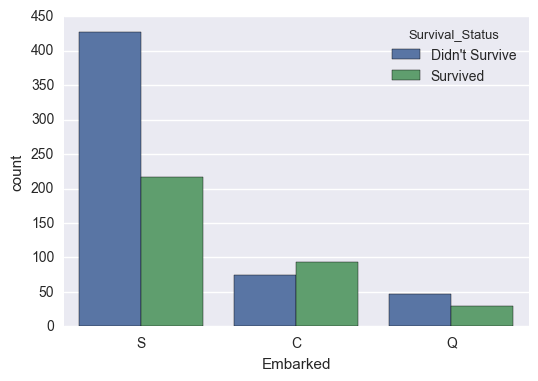

In [339]:
embarkation_axes = sns.countplot(x="Embarked", hue="Survival_Status", data=titanic_data_frame)

Based on the above visualization it is clear that the **passengers boarding from Cherbourg had the highest survival rate** of about 55.35%

<h2 align="center">SECTION 5: LIMITATION OF THE ANALYSIS</h2>

Since the data set is for only 891 passengers onboard from the 2224 passengers on board the titanic we cannot reach a definite conclusion from the analysis. We can just analyze the sample data set and find patterns in our investigation which do form the basis in my report. 

And as stated earlier that there were couple of passenger details missing in the data set like age, cabin details, port of embarkation. I chose to ignore the cabin and port details in my analysis but for missing ages I replaced them with 0 which might have had any impact in my statistical calculations and representations.

Besides the basic factors presented in the data set like passenger demographics, there might have been other factors which might have influenced passenger survival like the deck position, health conditions of the passengers etc. which might have influenced the survivability of the passengers.

<h2 align="center">SECTION 6: STATISTICAL TESTS</h2>

A statistical test provides a mechanism for making quantitative decisions about a process or processes. The intent is to determine whether there is enough evidence to "reject" a conjecture or hypothesis about the process. 

The chi-squared test of independence tests whether two categorical variables are independent. The test of independence is commonly used to determine whether variables like education, political views and other preferences vary based on demographic factors like gender, race and religion. So we can apply this chi-squared test to two determine male and female passengers survivability on the Titanic.

We can make the following hypothesis:

**Null Hypothesis, Ho** : Gender and Survivability are independent<br/>
**Alternative Hypothesis, H1** : Gender and Survivability are not dependent

In [356]:
import scipy as sp

surviving_male_passenger_count=male_surviving_passengers_df['PassengerId'].count()
dead_male_passenger_count=male_passengers_df['PassengerId'].count()-surviving_male_passenger_count
surviving_female_passenger_count=female_surviving_passengers_df['PassengerId'].count()
dead_female_passenger_count=female_passengers_df['PassengerId'].count()-surviving_female_passenger_count
male_female_survival_array=np.array([[surviving_male_passenger_count,dead_male_passenger_count],
                                     [surviving_female_passenger_count,dead_female_passenger_count]])
print male_female_survival_array
sp.stats.chi2_contingency(male_female_survival_array)

[[109 468]
 [233  81]]


(260.71702016732104,
 1.1973570627755645e-58,
 1L,
 array([[ 221.47474747,  355.52525253],
        [ 120.52525253,  193.47474747]]))

The output by the chi2_contingency function gives us the results chi-square independance test:
* The first value indicates the chi-square value: 260.71702016732104
* The Second value is the p-value: 1.1973570627755645e-58
* The Third value is the degrees of freedom: 1L
* The fourth value is expected frequencies table:

Given the p-value is 1.1973570627755645e-58 (due to chi-square value of 260.71702016732104) <
.00001, the result is significant at p-value at p < .05 indicating there is an association between gender
and survivability on the Titanic using the Titanic dataset given.
With such a low p-value we can reject the null hypothesis which is that gender and survivalbility are
independant and accept the alternative hypothesis which is gender and survivalbility are dependant
of each other.

<h2 align="center">SECTION 7:CONCLUSIONS</h2>

Conclusions I drew from my analysis were:

* female passengers had more chances of surviving from the male passengers(proved from Statistical Test in Section 6)
* maximum number of adult passengers had died in the disaster and child passengers had survived more in the disaster
* elderly woman had 100% survival rate. 
* woman/ child passengers had higher chances of survival.
* passengers in Pclass 1 had higher chances of survival  and class 3 had lower chances of survival.
* female passengers had higher survival rate irrespective of the class they were travelling in
* adults had the highest overall rate of survival in all the classes, highest being in Class 3. Children have the highest rate of survival in Class 3 and elderly in Class 1
* passengers boarding from Cherbourg had the highest survival rat

<h2 align="center">SECTION 8: REFERENCES</h2>

[1] https://en.wikipedia.org/wiki/Timeline_of_young_people's_rights_in_the_United_Kingdom<br/>
[2] http://seaborn.pydata.org/index.html<br/>
[3] http://www.premierexhibitions.com/exhibitions/3/3/titanic-artifact-exhibition/blog/truth-behind-women-and-children-first<br/>
[4]https://en.wikipedia.org/wiki/Women_and_children_first<br/>
[5]https://en.wikipedia.org/wiki/Passengers_of_the_RMS_Titanic<br/>
[6]https://www.encyclopedia-titanica.org/class-gender-titanic-disaster-1912~chapter-2.html

